In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [3]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.6 MB/s eta 0:00:00


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [4]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

## Visualization utilities

In [5]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

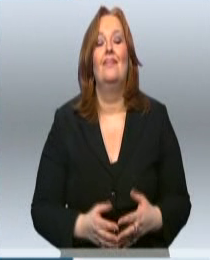

In [6]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/Signs!_Project/RWTH_phoenix_data/01April_2010_Thursday_heute-6694/images0001.png")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


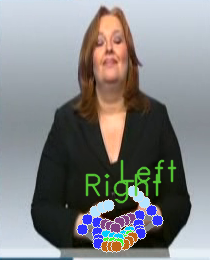

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9936625361442566, display_name='Left', category_name='Left')], [Category(index=0, score=0.9895015358924866, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.7486380338668823, y=0.8481237292289734, z=-3.561065753387993e-08, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.722767174243927, y=0.809578537940979, z=-0.0170160923153162, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6894358992576599, y=0.7804661989212036, z=-0.02666115202009678, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6578972339630127, y=0.755138635635376, z=-0.03351326286792755, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6338366866111755, y=0.7383872866630554, z=-0.041498664766550064, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6622152924537659, y=0.8303455710411072, z=-0.031546108424663544, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6192997097969055, y=0.83963221311569

In [7]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/drive/MyDrive/Signs!_Project/RWTH_phoenix_data/01April_2010_Thursday_heute-6694/images0001.png")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

print(detection_result)

In [8]:
print(len(detection_result.hand_landmarks[0]))

21


In [9]:
import os
import pandas as pd
import numpy as np
import cv2



#1. read clip
#2. go over each frame in clip
#3. in each frame, append to joint keys in joint dictionary
#4. store joint dictionary in json




#original path to the folder containing all the data
original_path = f"/content/drive/MyDrive/Signs!_Project/test_data/"
preprocessed_path = f"/content/drive/MyDrive/Signs!_Project/test_data_preprocessed/"

#iterate over folder to get all videos
for video in os.listdir(original_path):
  if video not in os.listdir(preprocessed_path):
    video_path = original_path + video + '/'
    c = 0 #counter for the used frames in the video

    #Create a dataframe with all the joints for each video
    joints_left = []
    joints_right = []
    columns = []
    entries = []
    for i in range(1,22):
        joints_left.append(f"joint_{i}_x_left")
        joints_left.append(f"joint_{i}_y_left")
        joints_right.append(f"joint_{i}_x_right")
        joints_right.append(f"joint_{i}_y_right")

    joints = joints_left + joints_right
    df = pd.DataFrame(entries, index=joints, columns=columns)

    #print(df)

    for frame_name in os.listdir(video_path):
        if frame_name.endswith(".png"):
            # Load the input image.
            frame_path = os.path.join(video_path, frame_name)
            frame = mp.Image.create_from_file(frame_path)

            # Detect hand landmarks from the input image.
            detection_result = detector.detect(frame)

            #check that frame is valid
            if (len(detection_result.handedness) == 2 #there are two hands detected
                and detection_result.handedness[0][0].category_name != detection_result.handedness[1][0].category_name): #if the hands are not identified as 2 left or two right hands
                #increase frame counter and add frame to dataframe
                c += 1
                #print(f"c: {c}")
                df[f"frame_{c}"] = np.zeros(84)
                # print(f"detection result {detection_result}")

                joint_landmarks_left = []
                joint_landmarks_right = []

                #create the dictionaries for the left and right hand landmarks for this frame
                for hand_index, hand_info in enumerate(detection_result.handedness):
                    hand_category = hand_info[0].category_name
                    landmarks = detection_result.hand_landmarks[hand_index]
                    # print(detection_result)
                    # print(detection_result.hand_landmarks)
                    # print(f"hand category: {hand_category}")

                    if hand_category == 'Left':
                      for landmark in landmarks:
                          joint_landmarks_left.append(landmark.x)
                          joint_landmarks_left.append(landmark.y)
                    elif hand_category == 'Right':
                      for landmark in landmarks:
                          joint_landmarks_right.append(landmark.x)
                          joint_landmarks_right.append(landmark.y)

                joint_landmarks = joint_landmarks_left + joint_landmarks_right
                # print(f"joint landmarks: {joint_landmarks}")
                # print(joint_landmarks_left)
                # print(joint_landmarks_right)
                df[f"frame_{c}"] = joint_landmarks



    #create the json file for the video from the video dataframe
    if len(df.columns) >= 50:
        print('video', video)
        df.to_json(f"/content/drive/MyDrive/Signs!_Project/test_data_preprocessed/{video}.json")




video 01April_2010_Thursday_tagesschau-4330
video 03July_2009_Friday_tagesschau-2015
video 01April_2010_Thursday_tagesschau-4331
video 03July_2009_Friday_tagesschau-2014
video 01April_2011_Friday_tagesschau-3377
video 01June_2010_Tuesday_tagesschau-5009


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 01December_2011_Thursday_tagesschau-3473
video 01May_2010_Saturday_tagesschau-7195
video 01May_2010_Saturday_tagesschau-7194
video 01November_2010_Monday_tagesschau-133


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)


video 01October_2012_Monday_tagesschau-5370
video 02August_2010_Monday_heute-1243
video 01October_2010_Friday_tagesschau-2701
video 01October_2009_Thursday_tagesschau-420
video 01October_2010_Friday_tagesschau-2700
video 02December_2009_Wednesday_tagesschau-4045


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 02December_2010_Thursday_tagesschau-3631
video 02July_2009_Thursday_tagesschau-2860
video 02June_2010_Wednesday_heute-6789
video 03August_2010_Tuesday_tagesschau-2780
video 03February_2010_Wednesday_tagesschau-2054
video 03February_2010_Wednesday_heute-2361
video 06January_2011_Thursday_tagesschau-5641
video 06July_2010_Tuesday_tagesschau-2658


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 06June_2010_Sunday_tagesschau-6363


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 03July_2011_Sunday_tagesschau-1665


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 03July_2011_Sunday_tagesschau-1672
video 03June_2011_Friday_tagesschau-7644


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 03October_2010_Sunday_tagesschau-5770
video 04December_2009_Friday_tagesschau-834
video 04December_2009_Friday_tagesschau-844
video 04December_2011_Sunday_tagesschau-7791
video 04December_2010_Saturday_tagesschau-4834
video 04July_2010_Sunday_tagesschau-7205
video 04July_2010_Sunday_tagesschau-7206
video 04May_2011_Wednesday_heute-3991


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 04May_2010_Tuesday_heute-460


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 04March_2011_Friday_tagesschau-2838
video 04October_2010_Monday_heute-5953
video 04October_2010_Monday_tagesschau-4723
video 05February_2010_Friday_tagesschau-2924
video 05January_2010_Tuesday_tagesschau-2667
video 05July_2010_Monday_heute-8688
video 05July_2010_Monday_tagesschau-1205
video 05March_2011_Saturday_tagesschau-5443
video 05May_2010_Wednesday_tagesschau-3352
video 05March_2011_Saturday_tagesschau-5447


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 05May_2010_Wednesday_tagesschau-3348


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)
<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

video 05May_2010_Wednesday_tagesschau-3360
video 05May_2010_Wednesday_tagesschau-3353


<ipython-input-9-b6e45c26b67e>:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"frame_{c}"] = np.zeros(84)


video 05November_2010_Friday_tagesschau-1872
video 06August_2010_Friday_tagesschau-2178
video 06February_2010_Saturday_tagesschau-7362
